# D212 Task 2

## Part I: Research Question

### A.  Describe the purpose of this data mining report by doing the following:

#### 1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).

Can we create variables in this dataset which account for the most variance in the dataset in order to remove variables with less relevant information to make it easier for machine learning algorithms to analyze our data using Principal Component Analysis?

#### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The goal of this analysis is to figure out which variables in this dataset account for most of the variance in the dataset so that we may reduce the dimesions of the dataset to only the most influential variables. This will allow us to subset the dataset into one that can be utilized for machine learning to predict important outcomes such as customer churn.

## Part II: Method Justification

### B.  Explain the reasons for using PCA by doing the following:

#### 1.  Explain how PCA analyzes the selected data set. Include expected outcomes.

PCA takes the variables you have in a dataset and creates new variables using combinations of those that are most correlated creating uncorrelated variables. This retains the information from the most influential variables and discards the information from the variables that account for the least amount of variance in a dataset. The expected outcome in this case would be these principal component variables of the dataset, ready to pass into a machine learning model.


#### 2.  Summarize one assumption of PCA.
 
One assumption of PCA is that the variables passed through it are continuous. This is because PCA relies on the distance between points to make it's principal components and the distance between categorical variables is meaningless.

## Part III: Data Preparation

### C.  Perform data preparation for the chosen dataset by doing the following:

#### 1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

* 'Population':int
* 'Children':int
* 'Age':int
* 'Income':float
* 'Outage_sec_perweek':float
* 'Email':int
* 'Contacts':int
* 'Yearly_equip_failure':int
* 'Tenure':float
* 'MonthlyCharge':float
* 'Bandwidth_GB_Year':float
* 'timely_responses':int
* 'timely_fixes':int
* 'timely_replacements':int
* 'reliability':int
* 'options':int
* 'respectful_response':int
* 'courteous_exchange':int
* 'evidence_of_active_listening':int

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# import data from csv
df = pd.read_csv('churn_clean.csv')

# set it so we can see all columns
pd.set_option('display.max_columns', None)

In [3]:
# create a dictionary of current column names mapping to desired column names
survey_dict = {'Item1':'timely_responses', 
               'Item2':'timely_fixes', 
               'Item3':'timely_replacements', 
               'Item4':'reliability', 
               'Item5':'options', 
               'Item6':'respectful_response', 
               'Item7':'courteous_exchange', 
               'Item8':'evidence_of_active_listening'}

# rename the column names based on survey_dict
df = df.rename(columns=survey_dict)

In [4]:
# change the dataframe columns to more appropriate data types
df_cleaned = df.astype({'Population':int, 
                        'Children':int, 
                        'Age':int,
                        'Income':float, 
                        'Outage_sec_perweek':float, 
                        'Email':int, 
                        'Contacts':int, 
                        'Yearly_equip_failure':int,
                        'Tenure':float, 
                        'MonthlyCharge':float,
                        'Bandwidth_GB_Year':float,
                        'timely_responses':int, 
                        'timely_fixes':int, 
                        'timely_replacements':int, 
                        'reliability':int, 
                        'options':int,
                        'respectful_response':int, 
                        'courteous_exchange':int, 
                        'evidence_of_active_listening':int}, copy=False)

In [5]:
# subset the dataframe to relevant variables
df_cleaned = df_cleaned[['Population', 'Age', 'Children', 'Income',
                         'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
                         'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',  
                         'timely_responses', 'timely_fixes', 'timely_replacements', 'reliability',
                         'options', 'respectful_response', 'courteous_exchange', 
                         'evidence_of_active_listening']]

#### 2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned[df_cleaned.columns])

In [7]:
df_cleaned

,Population,Age,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
0,-0.673405,0.720925,-0.972338,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,0.047772,-1.259957,-0.506592,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,-0.417238,-0.148730,0.890646,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,0.284537,-0.245359,-0.506592,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,0.110549,1.445638,-0.972338,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.631692,-1.453214,0.424900,0.564456,-0.196888,-0.005288,1.017588,-0.625864,1.273401,-0.294484,1.427298,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828
9996,4.670977,-0.245359,0.890646,-0.201344,-1.095915,0.986203,1.017588,-0.625864,1.002740,0.811726,1.054194,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596
9997,-0.647906,-0.245359,-0.506592,0.219037,-1.146198,-0.666282,-1.005852,-0.625864,0.487513,-0.061729,0.350984,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596
9998,1.788974,-0.680187,-0.506592,-0.820588,0.695616,0.655706,0.005868,-0.625864,1.383018,1.863005,1.407713,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384


In [8]:
df_cleaned.to_csv('t2_data')

## Part IV: Analysis

### D.  Perform PCA by doing the following:

#### 1.  Determine the matrix of all the principal components.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = df_cleaned.shape[1])
pca.fit_transform(df_cleaned)

array([[ 1.94229984, -1.33772109,  1.83148712, ..., -0.04413334,
        -0.02957312, -0.02583503],
       [-0.20682713, -1.62153642,  0.52873968, ..., -0.43690239,
        -0.67409581, -0.04137349],
       [-0.67096108, -0.89658833,  0.22169195, ..., -1.34494609,
         0.39479194,  0.06221873],
       ...,
       [ 1.44827422,  0.61659072,  0.01919726, ...,  0.27386443,
        -0.09430526, -0.0893575 ],
       [ 1.98596834,  2.06547212, -0.04033659, ...,  1.16980764,
        -0.34883414, -0.06780587],
       [-2.27748875,  1.45380492, -0.80550255, ...,  0.49506961,
        -0.10458537, -0.0308364 ]])

In [10]:
loadings = pd.DataFrame(pca.components_.T,
                    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                             'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC14','PC15', 'PC16',
                             'PC17', 'PC18'],
                    index=df_cleaned.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC14,PC15,PC16,PC17,PC18
Population,-0.002109,-0.005463,0.014732,-0.292151,0.264958,0.402355,0.355864,0.329128,0.161654,0.580378,0.167295,0.229022,-0.057130,0.019142,-0.016176,0.001210,-0.005661,-0.002356,-0.000322
Age,0.006459,0.000294,-0.029319,-0.455297,-0.417933,0.183902,0.152752,-0.024113,0.346066,-0.180481,0.234748,-0.590829,-0.045336,0.002513,-0.002495,-0.009405,0.005784,0.013696,0.022421
Children,0.004072,0.015862,0.028393,0.510569,0.345310,-0.089376,0.119069,0.226847,0.155912,-0.175953,0.655599,-0.241974,0.017020,-0.012250,-0.014011,0.014490,0.020915,-0.000948,-0.021615
Income,0.001038,0.006035,0.025865,0.252065,-0.285030,-0.084983,-0.429611,0.581477,0.449649,0.219833,-0.252659,-0.057674,-0.020484,-0.079018,-0.007573,-0.002561,0.005301,0.013466,-0.000910
Outage_sec_perweek,-0.017516,0.003927,-0.014363,-0.220115,0.339482,-0.591284,0.273527,0.262607,-0.149557,0.125521,-0.319263,-0.439536,-0.089844,0.016926,-0.008716,0.013529,0.018262,0.013516,0.000361
Email,0.008744,-0.020609,-0.003459,-0.190450,0.519450,0.319498,-0.103117,0.170129,0.290785,-0.592268,-0.328652,0.061145,0.061158,-0.017175,-0.016342,0.006449,-0.017253,0.000961,0.000226
Contacts,-0.008761,0.003318,-0.011853,-0.420731,-0.124577,-0.146366,-0.275202,0.508824,-0.434373,-0.248703,0.371468,0.241548,0.044032,-0.035285,-0.003279,-0.026498,0.020255,-0.000813,-0.000948
Yearly_equip_failure,-0.007688,0.017604,0.008199,0.167516,-0.373155,-0.147092,0.686465,0.241921,0.114547,-0.334113,-0.146136,0.365394,0.020739,0.006446,-0.015853,-0.001308,0.007488,-0.021448,-0.000145
Tenure,-0.016320,0.702323,-0.063085,-0.005355,-0.007568,0.048576,0.000016,0.007554,-0.028780,-0.001590,-0.028600,-0.027147,0.005940,-0.003507,0.006548,-0.007773,-0.004625,0.007519,-0.705251
MonthlyCharge,0.000930,0.039858,-0.009499,-0.298690,0.113921,-0.537631,-0.112559,-0.284655,0.562547,0.029519,0.228176,0.375187,-0.005920,0.014551,-0.016508,-0.000068,0.021494,-0.012007,-0.045778


#### 2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

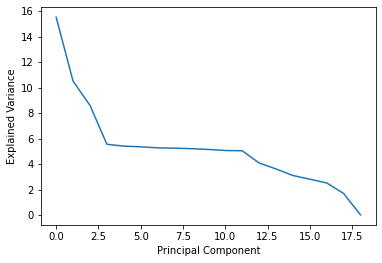

In [11]:
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

Using the elbow rule and the scree plot above, it seems that we should cut off our principal components at around 3.

In [12]:
best = [i for i in pca.explained_variance_ if i > 1]
best

[2.9488622035051897,
 1.9971117055793635,
 1.6367172748448058,
 1.0570205758853422,
 1.02999673614179,
 1.0193387021611011,
 1.0047927588716055]

Using the eigenvalues for our principal components as seen above it looks like we should keep 7 principal components. Let's see the results of each

#### 3.  Identify the variance of each of the principal components identified in part D2.

##### Elbow Rule

In [13]:
best_percs_elbow = [i * 100 for i in list(pca.explained_variance_ratio_)][0:3]
var_df_elbow = pd.DataFrame(zip(range(1,4), best_percs_elbow)).rename(columns={0:'Principal Component', 
                                                       1:'Percentage of Variance Explained'}).set_index('Principal Component')
var_df_elbow 

,Percentage of Variance Explained
Principal Component,
1,15.518775
2,10.510063
3,8.613440


##### Eigenvalues

In [14]:
best_percs_eigen = [i * 100 for i in list(pca.explained_variance_ratio_)][0:7]
var_df_eigen = pd.DataFrame(zip(range(1,8), best_percs_eigen)).rename(columns={0:'Principal Component', 
                                                       1:'Percentage of Variance Explained'}).set_index('Principal Component')
var_df_eigen 

,Percentage of Variance Explained
Principal Component,
1,15.518775
2,10.510063
3,8.613440
4,5.562710
5,5.420493
6,5.364404
7,5.287854


#### 4.  Identify the total variance captured by the principal components identified in part D2.

##### Elbow Rule

In [15]:
pd.DataFrame(var_df_elbow.sum(), columns=['Total'])

,Total
Percentage of Variance Explained,34.642278


##### Eigenvalues

In [16]:
pd.DataFrame(var_df_eigen.sum(), columns=['Total'])

,Total
Percentage of Variance Explained,56.27774


#### 5.  Summarize the results of your data analysis.

We have two different options here, depending on how far we want to reduce our dimensions and on how much information we are willing to lose. If we use the elbow rule, we would keep the first 3 components which account for 34.6% of the variance in our data. If we use the eigenvalues we would keep 7 principal components which account for 56.3% of our data variance. Which one to use would depend on whether you need to reduce your components as much as possible and if you are willing to lose more information or not in the process. As a result of this, we can now use either of these sets of components in order to pass through machine learning algorithms to find patterns in customer data.


## Part V: Attachments

### E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=58c5a0c1-77de-4b2f-87e8-ade30185e57b

### F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Jaadi, Zakaria. “A Step-by-Step Explanation of Principal Component Analysis (PCA).” Built In, https://builtin.com/data-science/step-step-explanation-principal-component-analysis. 